# Problema de valor inicial

Quando temos uma equação diferencial e o valor de um ponto da função.

In [7]:
using Plots
gr(size=(600,400))

Plots.GRBackend()

In [8]:
"""
    campo_ode(t0, tf, y0, yf, f; N = 10)
    campo_ode!(p, t0, tf, y0, yf, f; N = 10)

Desenha `y'(t) = f(t, y)` na caixa [t0, tf] × [y0, tf].
"""
function campo_ode!(p, t0, tf, y0, yf, f; N = 11)
    rt = range(t0, tf, length=N)
    ry = range(y0, yf, length=N)
    h = rt[2] - rt[1]
    C = vcat([[rt[i], ry[j], 0.9h, f(rt[i], ry[j])]' for i = 1:N, j = 1:N]...)
    C[:,4] /= maximum(abs.(C[:,4]))
    quiver!(p, C[:,1], C[:,2], quiver=(C[:,3],C[:,4]), c=:lightblue)
    scatter!(p, C[:,1], C[:,2], m=(2, :lightblue, stroke(1,:blue)))
    xlims!(t0 - h/2, tf + h/2)
    ylims!(y0 - h/2, yf + h/2)
    p
end

function campo_ode(args...; kwargs...)
    p = plot(leg=false)
    campo_ode!(p, args...; kwargs...)
end

campo_ode (generic function with 1 method)

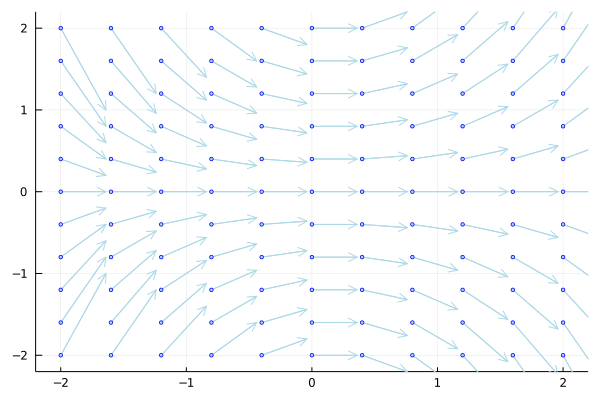

In [9]:
# uma equação diferencial define uma família de funções
# a função abaixo desenha o campo vetorial relacionado a uma equação diferencial
# ele representa a direção da reta tangente que uma possível solução teria, caso ela passasse pelo determinado ponto

campo_ode(-2, 2, -2, 2, (t,y) -> t * y)

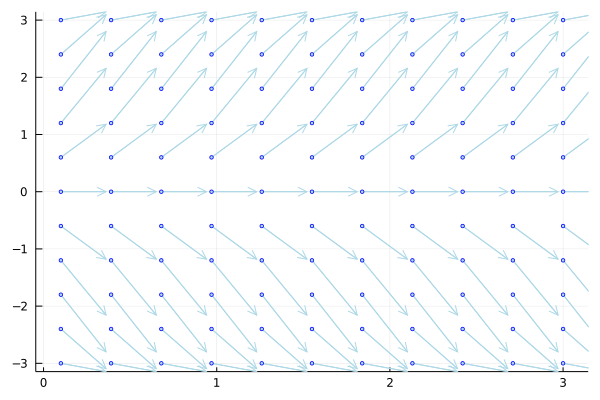

In [10]:
campo_ode(0.1, 3, -3, 3, (t,y) -> sin(y))

# Método de Euler

In [1]:
"""
    Método de Euler

    Constroi a função passando de ponto em ponto, indo na direção dada pela derivada
    
    Recebe como parâmetro:
    
    t0 -> início do intervalo
    tf -> fim do intervalo
    y0 -> ponto inicial
    f  -> derivada da função
    N  -> número de iterações

"""

function euler(t0, tf, y0, f; N = 100)
    t = range(t0, tf, length=N+1) # armazena os valores de t para facilitar na hora de plottar
    h = t[2] - t[1] # calcula o tamanho da partição baseado no range criado anteriormente
    
    w = zeros(N+1) # vetor que armazena todos os valores da solução
    w[1] = y0 # define um valor inicial para ser usado no método
    
    # calcula nos N pontos restantes da função
    for k = 1:N
        w[k+1] = w[k] + h * f(t[k], w[k])
    end
    
    return t, w
end

euler (generic function with 1 method)

In [4]:
t0, tf = -2.0, 2.0
f(t,y) = t * y

p = campo_ode(t0, tf, -2, 2, f)

# desenha a função para vários pontos iniciais diferentes
for y0 in [-3, -2, -1, 0, 1, 2, 3]
    t, y = euler(t0, tf, y0, f)
    plot!(p, t, y, lw=2)
end

# é possível ver que, dependendo do ponto inicial, a função toma um rumo diferente
# e a função sempre segue as direções dadas pelo campo vetorial
p

(101,)(101,)(101,)(101,)(101,)(101,)(101,)

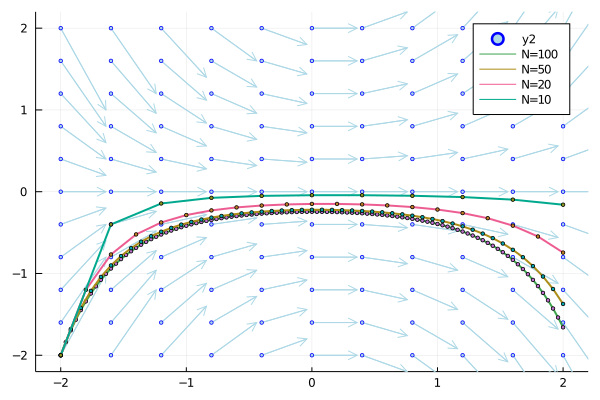

In [13]:
t0, tf = -2.0, 2.0
f(t,y) = t * y

p = campo_ode(t0, tf, -2, 2, f)

y0 = -2

# faz um desenho considerando vários números de iterações
for N = [100, 50, 20, 10]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true)
    scatter!(p, t, y, lw=2, ms=2, lab="")
end

# é possível ver que, quanto mais pontos usados, mais suave fica a curva gerada
# e fica mais próximo da solução real 
p

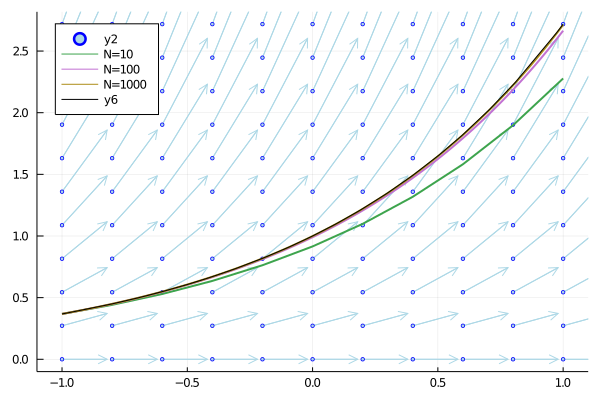

In [14]:
# agora veremos o resultado do método comparado com a função real
# podemos ver que de fato, quanto mais pontos usados, o resultado do método fica mais próximo da solução real

t0, tf = -1.0, 1.0

ysol(t) = exp(t) # função real
y0 = ysol(t0)

f(t,y) = y # equação diferencial

p = campo_ode(t0, tf, 0, ysol(tf), f)

for N = [10, 100, 1000]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true) # solução da equação com Euler
end

plot!(p, ysol, t0, tf, c=:black, legend=:topleft) # função real
p

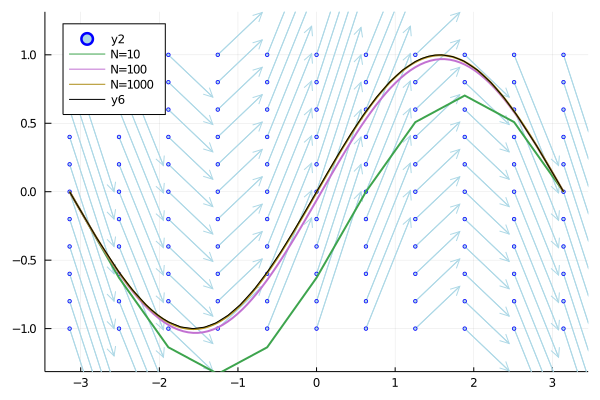

In [15]:
# usando outra função

t0, tf = -π, π

ysol(t) = sin(t) # função real
y0 = ysol(t0)

f(t,y) = cos(t) # equação diferencial

p = campo_ode(t0, tf, -1.0, 1.0, f)

for N = [10, 100, 1000]
    t, y = euler(t0, tf, y0, f, N=N)
    plot!(p, t, y, lw=2, lab="N=$N", leg=true) # solução da equação com Euler
end

plot!(p, ysol, t0, tf, c=:black, legend=:topleft) # função real
p

# Método de Taylor

In [16]:
"""
    Método de taylor

    Usa o mesmo princípio de Euler, mas usa um termo a mais da expansão de taylor

    Recebe como parâmetro:
    
    t0 -> início do intervalo
    tf -> fim do intervalo
    y0 -> ponto inicial
    f  -> derivada da função
    ft -> derivada de f em relação a t
    fy -> derivada de f em relação a y
    N  -> número de iterações

"""

function taylor2(t0, tf, y0, f, ft, fy; N = 100)
    t = range(t0, tf, length=N+1) # armazena os valores de t para facilitar na hora de plottar
    h = t[2] - t[1] # calcula o tamanho da partição baseado no range criado anteriormente
    
    w = zeros(N+1) # vetor que armazena todos os valores da solução
    w[1] = y0 # define um valor inicial para ser usado no método
    
    for k = 1:N
        fk = f(t[k], w[k]) # f no ponto k
        ftk = ft(t[k], w[k]) # derivada de f em relação a t no ponto k
        fyk = fy(t[k], w[k]) # derivada de f em relação a y no ponto k
        
        # calcula o valor da função no ponto, considerando uma expansão de taylor de ordem 2
        w[k+1] = w[k] + h * fk + h^2 / 2 * (ftk + fyk * fk)
    end
    
    return t, w
end


taylor2 (generic function with 1 method)

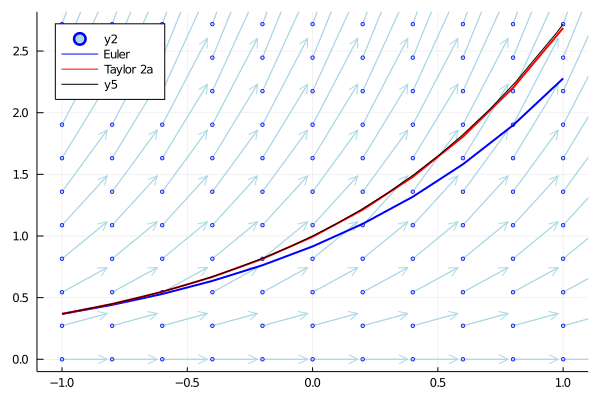

In [17]:
# faremos a comparação entre os dois métodos
# é possível ver que, com a mesma quantidade de pontos usados, o método de Taylor aproxima a solução melhor
t0, tf = -1.0, 1.0

ysol(t) = exp(t) # função real
y0 = ysol(t0)

f(t,y) = y # equação diferencial
ft(t, y) = 0 # derivada de f em relação a t
fy(t, y) = 1 # derivada de f em relação a y

p = campo_ode(t0, tf, 0, ysol(tf), f)

# usando o método de Euler
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw=2, lab="Euler", c=:blue, leg=true)

# usando o método de Taylor
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw=2, lab="Taylor 2a", c=:red, leg=true)

# função real
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

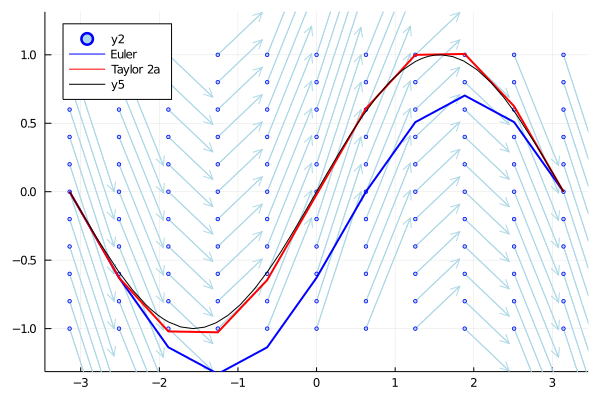

In [18]:
# usando outra função

t0, tf = -π, π

ysol(t) = sin(t) # função real
y0 = ysol(t0)

f(t,y) = cos(t) # equação diferencial
ft(t, y) = -sin(t) # derivada de f em relação a t
fy(t, y) = 0 # derivada de f em relação a y

p = campo_ode(t0, tf, -1.0, 1.0, f)

# usando o método de Euler
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw=2, lab="Euler", c=:blue, leg=true)

# usando o método de Taylor
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw=2, lab="Taylor 2a", c=:red, leg=true)

# função
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)

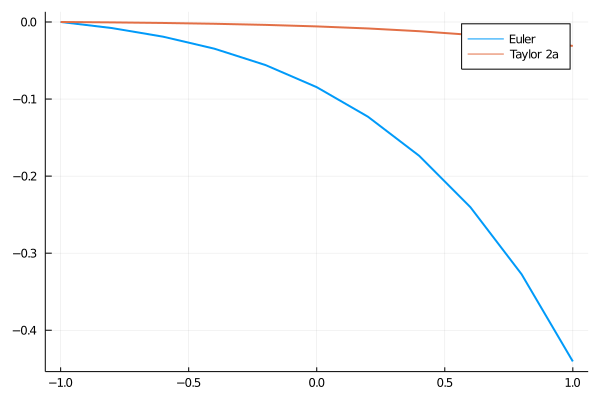

In [19]:
# comparação do erro dos dois métodos
# podemos ver que o erro de Euler aumenta muito mais em módulo

t0, tf = -1.0, 1.0

ysol(t) = exp(t)
y0 = ysol(t0)

f(t,y) = y # equação diferencial
ft(t, y) = 0 # derivada de f em relação a t
fy(t, y) = 1 # derivada de f em relação a y

# usando o método de Euler
t, y = euler(t0, tf, y0, f, N=10)
p = plot(t, y - ysol.(t), lw=2, leg=false,  lab="Euler")

# usando o método de Taylor
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(t, y - ysol.(t), lw=2, leg=true, lab="Taylor 2a")

# Runge-Kutta


In [20]:
"""
    Método de Runge-Kutta

    Em vez de fazer a expansão de segunda ordem, como no método de Taylor, faz uma média ponderada de duas inclinações

    Recebe como parâmetro:
    
    t0 -> início do intervalo
    tf -> fim do intervalo
    y0 -> ponto inicial
    f  -> derivada da função
    β  -> peso da segunda inclinação
    N  -> número de iterações

"""

function rungekutta2(t0, tf, y0, f, β; N = 100)
    @assert β != 0 # garante que β não é zero, para nao dar problema no método
    
    t = range(t0, tf, length=N+1) # armazena os valores de t para facilitar na hora de plottar
    h = t[2] - t[1] # calcula o tamanho da partição baseado no range criado anteriormente
    
    w = zeros(N+1) # vetor que armazena todos os valores da solução
    w[1] = y0 # define um valor inicial para ser usado no método
    
    α = 1 - β # peso da primeira inclinação
    δ = γ = 1 / 2β # coeficiente para calcular a inclinação num outro ponto próximo
    
    for k = 1:N
        θ₁ = f(t[k], w[k]) # primeira inclinação a ser usada
        θ₂ = f(t[k] + δ * h, w[k] + γ * h * θ₁) # outra inclinação para ser usada
        
        # calcula o valor da função no ponto, considerando uma média ponderada entre θ₁ e θ₂
        w[k+1] = w[k] + h * (α * θ₁ + β * θ₂)
    end
    
    return t, w
end

rungekutta2 (generic function with 1 method)

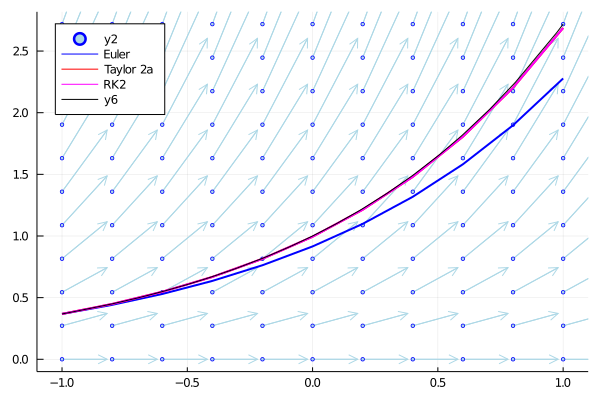

In [21]:
# comparação entre os três métodos

t0, tf = -1.0, 1.0

ysol(t) = exp(t) # função real
y0 = ysol(t0)

f(t,y) = y # equação diferencial
ft(t, y) = 0 # derivada de f em relação a t
fy(t, y) = 1 # derivada de f em relação a y

p = campo_ode(t0, tf, 0, ysol(tf), f)

# usando o método de Euler
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw=2, lab="Euler", c=:blue, leg=true)

# usando o método de Taylor
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw=2, lab="Taylor 2a", c=:red, leg=true)

# usando o método de Runge-Kutta
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=10)
plot!(p, t, y, lw=2, lab="RK2", c=:magenta, leg=true)

# função real
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

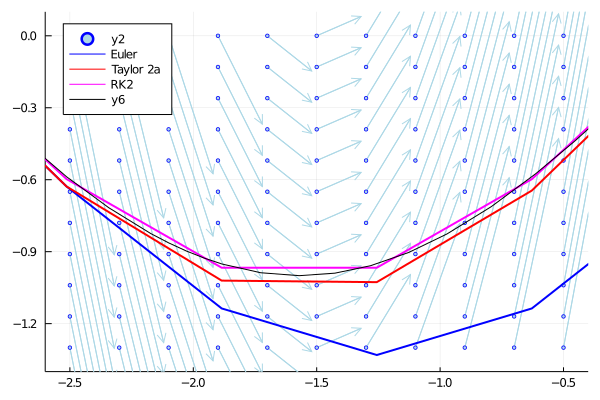

In [22]:
# usando outra função

t0, tf = -π, π

ysol(t) = sin(t) # função real
y0 = ysol(t0)

f(t,y) = cos(t) # equação diferencial
ft(t, y) = -sin(t) # derivada de f em relação a t
fy(t, y) = 0 # derivada de f em relação a y

p = campo_ode(-2.5, -0.5, -1.3, 0.0, f)

# usando o método de Euler
t, y = euler(t0, tf, y0, f, N=10)
plot!(p, t, y, lw=2, lab="Euler", c=:blue, leg=true)

# usando o método de Taylor
t, y = taylor2(t0, tf, y0, f, ft, fy, N=10)
plot!(p, t, y, lw=2, lab="Taylor 2a", c=:red, leg=true)

# usando o método de Runge-Kutta
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=10)
plot!(p, t, y, lw=2, lab="RK2", c=:magenta, leg=true)

# função real
plot!(p, ysol, t0, tf, c=:black, legend=:topleft)
p

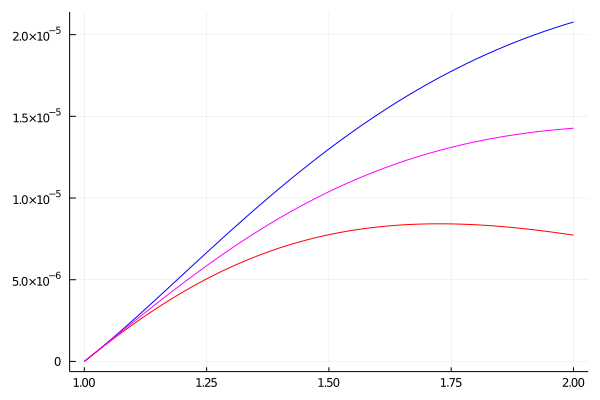

In [26]:
# fazendo uma comparação do erro de acordo com Beta

#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#
t0, tf = 1.0, 2.0

ysol(t) = t^2 * exp(-t) # função real
y0 = ysol(t0)

f(t,y) = 2y / t - y # equação diferencial

plot(leg=false)

# β = 0.5
t, y = rungekutta2(t0, tf, y0, f, 0.5, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:blue)

# β = 1.0
t, y = rungekutta2(t0, tf, y0, f, 1.0, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:red)

# β = 2/3
t, y = rungekutta2(t0, tf, y0, f, 2/3, N=50)
plot!(t, y - ysol.(t), lw=1, leg=false, c=:magenta)

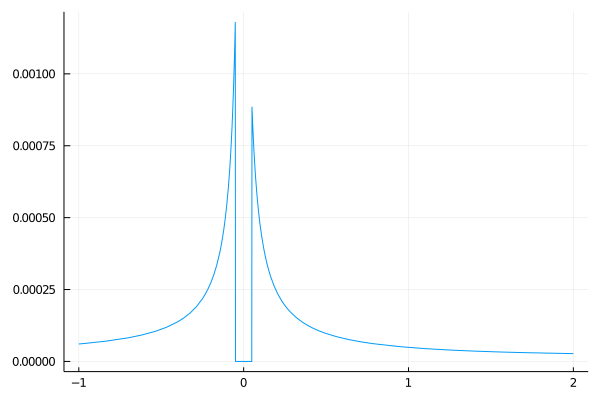

In [24]:
# como escolher o melhor valor de Beta?
# aqui tem uma comparação para ver como o erro do método se comporta de acordo com o valor de Beta 
# para essa função, quanto mais próximo de zero está beta, maior o erro

using LinearAlgebra

#=
    y(t) = t^2 * exp(-t)
    y'(t) = 2t * exp(-t) - t^2 * exp(t)
    y'(t) = 2y / t - y
=#

t0, tf = 1.0, 2.0

ysol(t) = t^2 * exp(-t) # função real
f(t,y) = 2y / t - y # equação diferencial

y0 = ysol(t0)

# função erro em relação a Beta
E(β) = begin
    abs(β) < 0.05 && return 0
    t, y = rungekutta2(t0, tf, y0, f, β, N=50)
    ys = ysol.(t)
    norm(y - ys)
end

plot(E, -1, 2, leg=false)

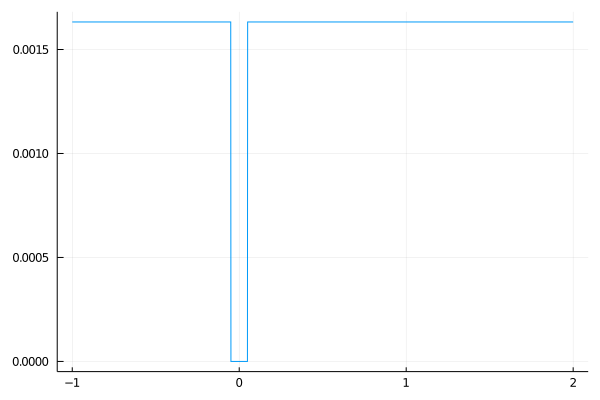

In [29]:
# como escolher o melhor valor de Beta?
# aqui tem uma comparação para ver como o erro do método se comporta de acordo com o valor de Beta 
# para essa função, o erro permanece estável, independente do valor de Beta

using LinearAlgebra

#=
    y(t) = exp(t)
    y'(t) = exp(t)
=#

t0, tf = 1.0, 2.0

ysol(t) = exp(t) # função real
f(t,y) = y # equação diferencial

y0 = ysol(t0)

# função do relo em relação a Beta
E(β) = begin
    abs(β) < 0.05 && return 0
    t, y = rungekutta2(t0, tf, y0, f, β, N=50)
    ys = ysol.(t)
    norm(y - ys)
end

plot(E, -1, 2, leg=false)